In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from torchvision import transforms

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

### Load data and obtain train-test split

In [16]:
train_data = pd.read_csv('../../Data/fashion-mnist_train.csv')
test_data = pd.read_csv('../../Data/fashion-mnist_test.csv')

X_train = train_data.drop('label', axis=1)
y_train = train_data['label']
X_test = test_data.drop('label', axis=1)
y_test = test_data['label']

print(f"Data with {len(X_train.columns)} features")
print(f"Train set of size {len(X_train)} with {len(y_train)} labels")
print(f"Test set of size {len(X_test)} with {len(y_test)} labels")

Data with 784 features
Train set of size 60000 with 60000 labels
Test set of size 10000 with 10000 labels


### Augment images for train set

In [17]:
# Format each image as 28x28 matrix (For augmentation purposes)
train_images = []
for index, i in X_train.iterrows():
    image = []
    for _row in range(28):
        row = []
        for _col in range(28):
            row.append(i.iloc[_row*28+_col])
        image.append(row)
    train_images.append(np.array(image))

In [18]:
train_images_augmented = []
y_train_augmented = []

transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.RandomRotation(30)
])

for i, _image in enumerate(train_images):
    
    # One augmented image for each existing image
    _image_pil = Image.fromarray(_image.astype('uint8'))
    _image_augmented_pil = transform(_image_pil)
    _image_augmented = np.array(_image_augmented_pil)

    train_images_augmented.append(_image)
    train_images_augmented.append(_image_augmented)

    y_train_augmented.append(y_train[i])
    y_train_augmented.append(y_train[i])

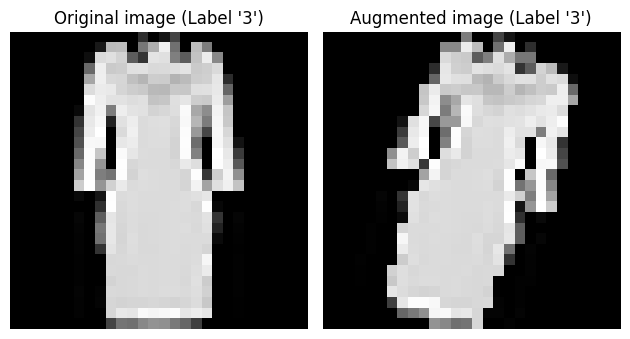

In [22]:
# To visualise sample augmented image
sample_image = train_images_augmented[8]
sample_image_augmented = train_images_augmented[9]

fig,ax = plt.subplots(1,2)
ax[0].imshow(sample_image, cmap='gray')
ax[0].axis('off')
ax[0].set_title(f"Original image (Label '{y_train_augmented[8]}')")
ax[1].imshow(sample_image_augmented, cmap='gray')
ax[1].axis('off')
ax[1].set_title(f"Augmented image (Label '{y_train_augmented[9]}')")
fig.tight_layout()
plt.show()

### Training Decision Tree

In [23]:
# Flatten all images
X_train_augmented = [i.flatten() for i in train_images_augmented]

print(f"{len(X_train_augmented)} input with {len(X_train_augmented[0])} features")
print(f"{len(y_train_augmented)} labels")

120000 input with 784 features
120000 labels


In [24]:
# Train without augmented images
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
train_predictions = tree.predict(X_train)
test_predictions = tree.predict(X_test)

train_acc = accuracy_score(y_train, train_predictions)
test_acc = accuracy_score(y_test, test_predictions)
print("Training Accuracy:", train_acc)
print("Test Accuracy:", test_acc)

Training Accuracy: 1.0
Test Accuracy: 0.7958


In [26]:
# Train with augmented images
tree = DecisionTreeClassifier()
tree.fit(X_train_augmented, y_train_augmented)
train_predictions = tree.predict(X_train_augmented)
test_predictions = tree.predict(X_test)

train_acc = accuracy_score(y_train_augmented, train_predictions)
test_acc = accuracy_score(y_test, test_predictions)
print("Training Accuracy:", train_acc)
print("Test Accuracy:", test_acc)

Training Accuracy: 1.0
Test Accuracy: 0.7862


C:\Users\limZH\OneDrive\NUS\Y3\Y3S2\CS3244\Project\venv_pc\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


- Perfect train accuracy but test accuracy is not the best for both cases ; Model is likely to have overfit on training data.
- Can consider Random Forest to decrease variance.

### Train Random Forest

In [31]:
# Train without augmented images
# Using ideal hyperparameters
forest = RandomForestClassifier(
    n_estimators=300,
    max_depth=30,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features="sqrt",
    random_state=42
)
forest.fit(X_train, y_train)
train_predictions = forest.predict(X_train)
test_predictions = forest.predict(X_test)

train_acc = accuracy_score(y_train, train_predictions)
test_acc = accuracy_score(y_test, test_predictions)
print("Training Accuracy:", train_acc)
print("Test Accuracy:", test_acc)

Training Accuracy: 0.9999666666666667
Test Accuracy: 0.8874


In [32]:
# To train with augmented images
# Using ideal hyperparameters
forest = RandomForestClassifier(
    n_estimators=300,
    max_depth=30,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features="sqrt",
    random_state=42
)
forest.fit(X_train_augmented, y_train_augmented)
train_predictions = forest.predict(X_train_augmented)
test_predictions = forest.predict(X_test)

train_acc = accuracy_score(y_train_augmented, train_predictions)
test_acc = accuracy_score(y_test, test_predictions)
print("Training Accuracy:", train_acc)
print("Test Accuracy:", test_acc)

C:\Users\limZH\OneDrive\NUS\Y3\Y3S2\CS3244\Project\venv_pc\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Training Accuracy: 0.9997083333333333
Test Accuracy: 0.8755


### Tune hyperparameters for Random Forest

In [33]:
# Define hyperparameters to tune
param_grid = {
    'n_estimators': [300],
    'max_depth': [20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': ['sqrt', 0.3],
    'bootstrap': [True],
}

n_combi = 1
for i in param_grid:
    n_combi *= len(param_grid[i])
print(f"{n_combi} hyperparameter combinations")

54 hyperparameter combinations


In [ ]:
# Grid search to find the best combination of hyperparameter
# `cv`parameter is for cross validation, which ensures reliable evaluation of each hyperparameter combination
# TAKES VERY LONG TO RUN !!! Hyperparameter tuning was done with data size 10000 which took 1.5 hours
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

In [ ]:
best_forest = grid_search.best_estimator_
best_forest.fit(X_train, y_train)
train_predictions = forest.predict(X_train)
test_predictions = forest.predict(X_test)

train_acc = accuracy_score(y_train, train_predictions)
test_acc = accuracy_score(y_test, test_predictions)
print(best_forest)
print(f"Min samples split {best_forest.min_samples_split}")
print(f"Min samples leaf {best_forest.min_samples_leaf}")
print(f"Max features {best_forest.max_features}")
print("Training Accuracy:", train_acc)
print("Test Accuracy:", test_acc)